### gdown

In [ ]:
!pip install --upgrade --no-cache-dir gdown

# Q2

In [ ]:
# This Q has no code

# Q3

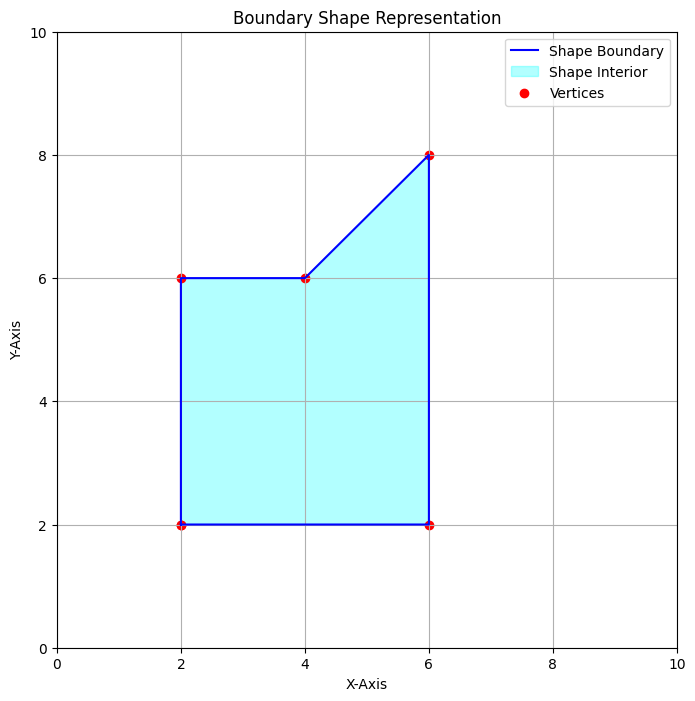

In [72]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[2, 2], [2, 6], [4, 6], [6, 8], [6, 2]  ,[2, 2]])

plt.figure(figsize=(8, 8))
plt.plot(*points.T, 'b-', label='Shape Boundary')
plt.fill(*points.T, color='cyan', alpha=0.3, label='Shape Interior')
plt.scatter(points[:, 0], points[:, 1], color='red', label='Vertices')

plt.title('Boundary Shape Representation')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.show()

In [83]:
import numpy as np

# تعریف نقاط
points = np.array([[2, 2], [2, 6], [4, 6], [6, 8], [6, 2], [2, 2]])  # اصلاح خطا

# محاسبه معادلات خطوط
lines = []
for i in range(len(points) - 1):
    x1, y1 = points[i]
    x2, y2 = points[i + 1]
    A = y1 - y2
    B = x2 - x1
    C = x1 * y2 - x2 * y1
    lines.append((A, B, C))

# نمایش معادلات خطوط
for i, (A, B, C) in enumerate(lines):
    print(f"Line {i + 1}: {A}x + {B}y + {C} = 0")

Line 1: -4x + 0y + 8 = 0
Line 2: 0x + 2y + -12 = 0
Line 3: -2x + 2y + -4 = 0
Line 4: 6x + 0y + -36 = 0
Line 5: 0x + -4y + 8 = 0


Epoch [10/500], Loss: 0.3938
Epoch [20/500], Loss: 0.3563
Epoch [30/500], Loss: 0.3191
Epoch [40/500], Loss: 0.2817
Epoch [50/500], Loss: 0.2432
Epoch [60/500], Loss: 0.2102
Epoch [70/500], Loss: 0.1814
Epoch [80/500], Loss: 0.1575
Epoch [90/500], Loss: 0.1394
Epoch [100/500], Loss: 0.1258
Epoch [110/500], Loss: 0.1160
Epoch [120/500], Loss: 0.1085
Epoch [130/500], Loss: 0.1025
Epoch [140/500], Loss: 0.0974
Epoch [150/500], Loss: 0.0930
Epoch [160/500], Loss: 0.0891
Epoch [170/500], Loss: 0.0856
Epoch [180/500], Loss: 0.0822
Epoch [190/500], Loss: 0.0789
Epoch [200/500], Loss: 0.0758
Epoch [210/500], Loss: 0.0727
Epoch [220/500], Loss: 0.0697
Epoch [230/500], Loss: 0.0668
Epoch [240/500], Loss: 0.0643
Epoch [250/500], Loss: 0.0621
Epoch [260/500], Loss: 0.0601
Epoch [270/500], Loss: 0.0583
Epoch [280/500], Loss: 0.0567
Epoch [290/500], Loss: 0.0551
Epoch [300/500], Loss: 0.0537
Epoch [310/500], Loss: 0.0523
Epoch [320/500], Loss: 0.0510
Epoch [330/500], Loss: 0.0497
Epoch [340/500], Lo

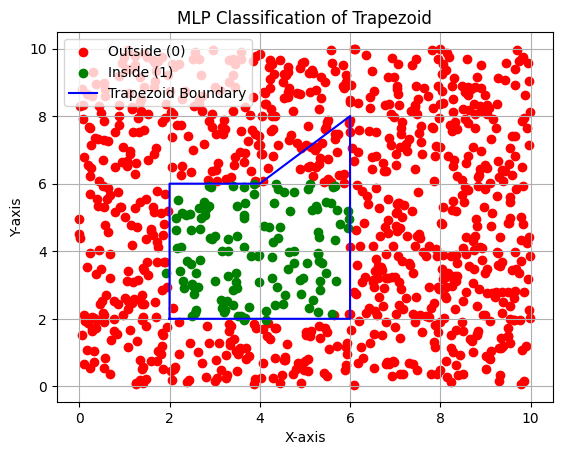

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the MLP class
class TrapezoidMLP(nn.Module):
    def __init__(self):
        super(TrapezoidMLP, self).__init__()
        # First hidden layer with 5 neurons
        self.hidden1 = nn.Linear(2, 5)
        # Second hidden layer with 2 neurons
        self.hidden2 = nn.Linear(5, 2)
        # Output layer with 1 neuron
        self.output = nn.Linear(2, 1)

        # Initialize weights and biases for the first layer manually
        self.initialize_weights()

    def initialize_weights(self):
        # Weights and biases for the 5 edges of the trapezoid
        self.hidden1.weight.data = torch.tensor([
            [1.0, 0.0],   # Line 1: (2, 2) -> (2, 6)
            [0.0, 1.0],   # Line 2: (2, 6) -> (4, 6)
            [-2.0, 1.0],  # Line 3: (4, 6) -> (6, 8)
            [0.0, -1.0],  # Line 4: (6, 8) -> (6, 2)
            [-1.0, 0.0],  # Line 5: (6, 2) -> (2, 2)
        ])
        self.hidden1.bias.data = torch.tensor([-2.0, -6.0, 2.0, 8.0, 2.0])

        # Initialize other layers randomly
        nn.init.xavier_uniform_(self.hidden2.weight)
        nn.init.zeros_(self.hidden2.bias)
        nn.init.xavier_uniform_(self.output.weight)
        nn.init.zeros_(self.output.bias)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))  # First hidden layer
        x = torch.relu(self.hidden2(x))  # Second hidden layer
        x = torch.sigmoid(self.output(x))  # Output layer
        return x

# Generate random datasets
def generate_data(n_points):
    x = torch.rand(n_points) * 10  # x in range [0, 10]
    y = torch.rand(n_points) * 10  # y in range [0, 10]
    points = torch.stack([x, y], dim=1)

    # Determine labels (inside or outside the trapezoid)
    labels = (
        (x >= 2) & (x <= 6) &
        (y >= 2) &
        (y <= 6 + (x - 4).clamp(min=0)) &  # Line 3 slope constraint
        (y <= 6)
    ).float()

    return points, labels

# Generate training and testing datasets
train_points, train_labels = generate_data(20000)
test_points, test_labels = generate_data(1000)

# Initialize the MLP
model = TrapezoidMLP()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
n_epochs = 500
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_points).squeeze()
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(test_points).squeeze()
    test_predictions = (test_outputs >= 0.5).float()
    accuracy = (test_predictions == test_labels).float().mean().item() * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

# Visualize the results
with torch.no_grad():
    outputs = model(test_points).squeeze()
    inside_points = outputs >= 0.5
    outside_points = outputs < 0.5

plt.scatter(test_points[outside_points, 0], test_points[outside_points, 1], color='red', label='Outside (0)')
plt.scatter(test_points[inside_points, 0], test_points[inside_points, 1], color='green', label='Inside (1)')

# Plot the trapezoid boundary
trapezoid_vertices = [(2, 2), (2, 6), (4, 6), (6, 8), (6, 2)]
trapezoid_x = [v[0] for v in trapezoid_vertices] + [trapezoid_vertices[0][0]]
trapezoid_y = [v[1] for v in trapezoid_vertices] + [trapezoid_vertices[0][1]]
plt.plot(trapezoid_x, trapezoid_y, color='blue', label='Trapezoid Boundary')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.title("MLP Classification of Trapezoid")
plt.show()

# Q4

In [ ]:
# link from google drive: https://drive.google.com/file/d/1KOFT6HeG6S7tUqr-1gsiab17Z_WsEopX/view?usp=sharing

import gdown
import pandas as pd
file_id = "1KOFT6HeG6S7tUqr-1gsiab17Z_WsEopX"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "Admission.csv"
gdown.download(url, File_dir, quiet=False)
# move to dataframe
df = pd.read_csv('Admission.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1KOFT6HeG6S7tUqr-1gsiab17Z_WsEopX
To: /content/Admission.csv
100%|██████████| 12.9k/12.9k [00:00<00:00, 12.4MB/s]


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

### A

In [ ]:
df = df.drop('Serial No.', axis=1)

In [ ]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


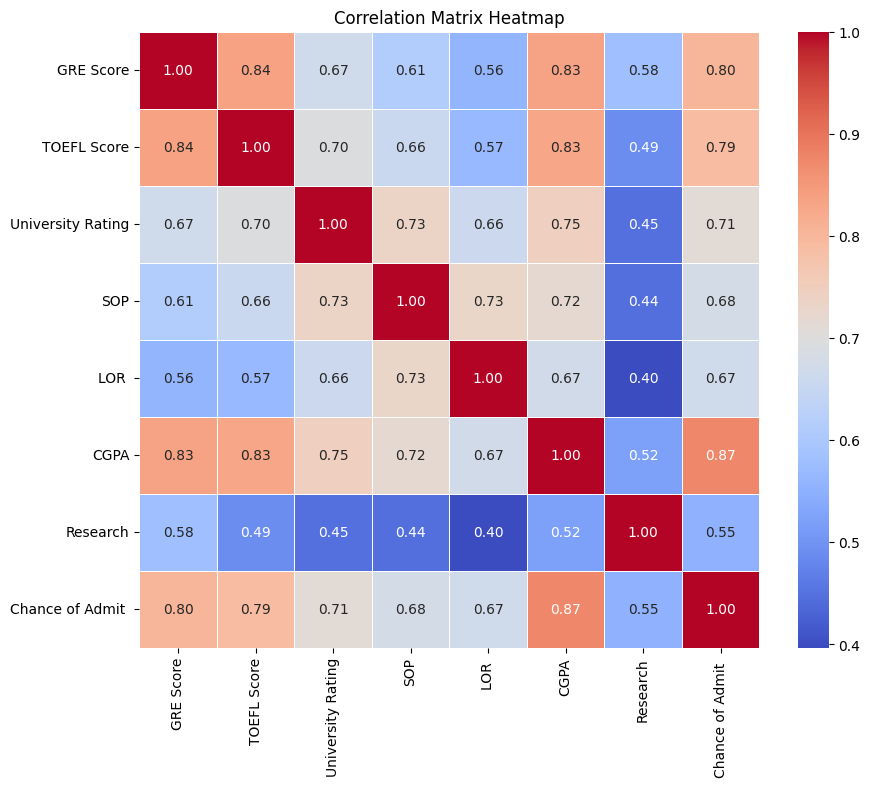

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
correlation_with_admit = correlation_matrix["Chance of Admit "].drop("Chance of Admit ").sort_values(ascending=False)
print("Correlation with Chance of Admit (Descending Order):")
print(correlation_with_admit)

highest_correlation_feature = correlation_with_admit.idxmax()
print(f"Highest correlated feature with Chance of Admit: {highest_correlation_feature}")

Correlation with Chance of Admit (Descending Order):
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64
Highest correlated feature with Chance of Admit: CGPA


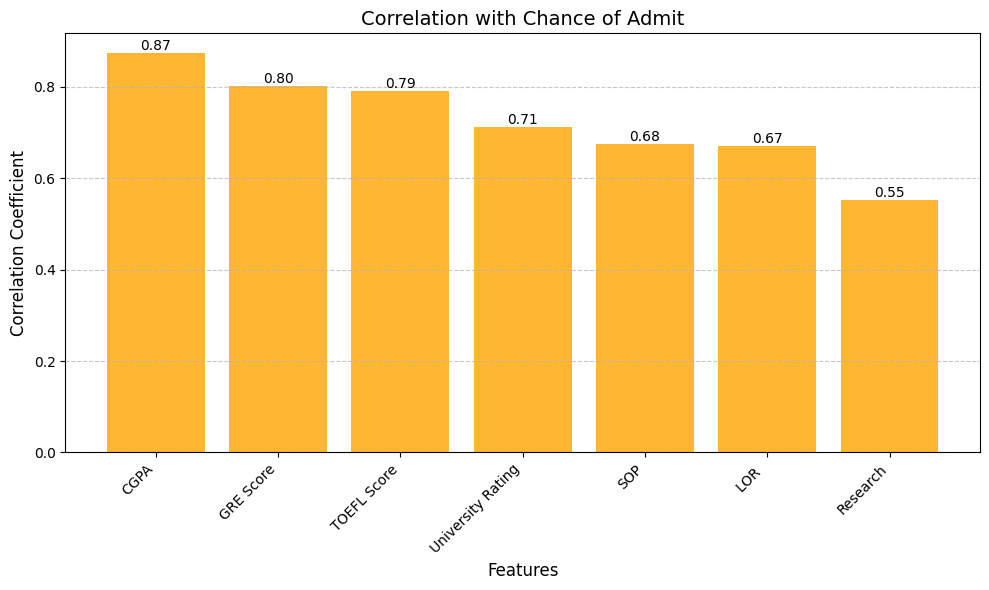

In [ ]:
correlation_data = dict(sorted(correlation_with_admit.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(correlation_data.keys(), correlation_data.values(), alpha=0.8, color="orange")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Correlation with Chance of Admit", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

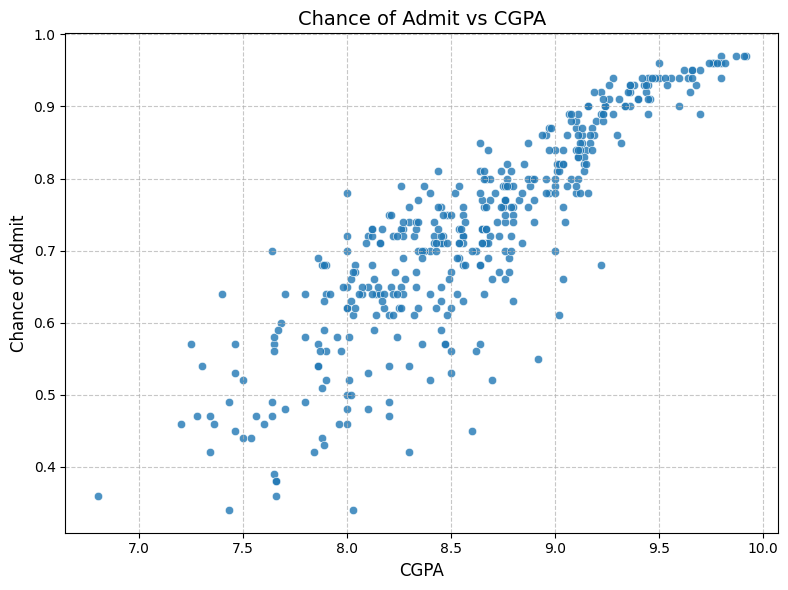

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

highest_correlation_feature = "CGPA"

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[highest_correlation_feature], y=df["Chance of Admit "], alpha=0.8)

plt.title(f"Chance of Admit vs {highest_correlation_feature}", fontsize=14)
plt.xlabel(highest_correlation_feature, fontsize=12)
plt.ylabel("Chance of Admit", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### B

In [ ]:
y = df["Chance of Admit "]

target_analysis = y.value_counts()

print("Analysis of Target Variable:")
print(target_analysis)

Analysis of Target Variable:
Chance of Admit 
0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: count, dtype: int64


In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split

X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (340, 7)
Test Set Size: (60, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Normalized Training Data (First 5 Rows):")
print(X_train_normalized.head())

print("\nNormalized Test Data (First 5 Rows):")
print(X_test_normalized.head())

Normalized Training Data (First 5 Rows):
   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  Research
0       0.22     0.500000               0.75  0.375  0.500  0.535256       0.0
1       0.52     0.321429               0.25  0.375  0.250  0.487179       1.0
2       0.34     0.642857               0.75  0.750  0.875  0.503205       0.0
3       0.12     0.107143               0.25  0.500  0.250  0.237179       1.0
4       0.44     0.464286               0.25  0.375  0.500  0.423077       0.0

Normalized Test Data (First 5 Rows):
   GRE Score  TOEFL Score  University Rating    SOP  LOR       CGPA  Research
0       0.22     0.428571               0.50  0.625  0.75  0.423077       1.0
1       0.42     0.357143               0.50  0.875  0.75  0.589744       1.0
2       1.00     0.785714               1.00  0.750  0.75  0.897436       1.0
3       0.70     0.571429               0.75  0.875  0.75  0.724359       1.0
4       0.22     0.178571               0.25  0.500  0.50

### C

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [29]:
# MAking Validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_normalized, y_train, test_size=0.1, random_state=42)

In [30]:
# first_model : 1 hidden layer
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# second_model : 3 hidden layer
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# In the last layers I used sigmoid :)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
optimizer1 = Adam(learning_rate=0.001)
optimizer2 = Adam(learning_rate=0.001)
loss = 'binary_crossentropy'

In [36]:
model_1.compile(optimizer=optimizer1, loss=loss, metrics=['mae'])
model_2.compile(optimizer=optimizer2, loss=loss, metrics=['mae'])

In [37]:
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


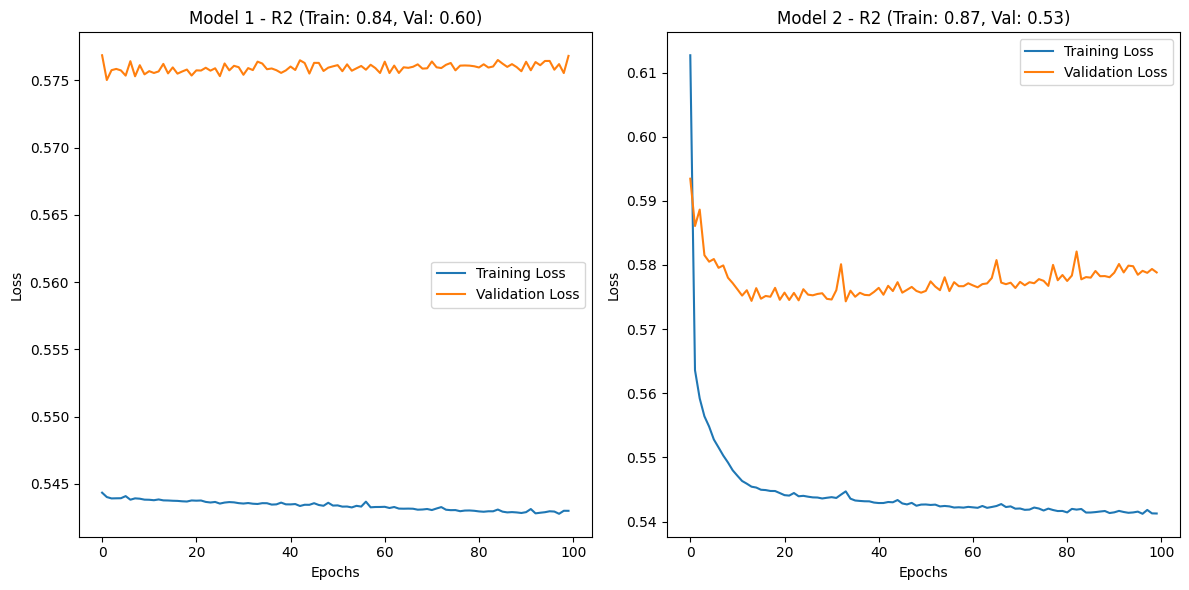

In [38]:
# R2 score calculation
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)
train_r2_1 = r2_score(y_train, y_train_pred_1)
val_r2_1 = r2_score(y_val, y_val_pred_1)

y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)
train_r2_2 = r2_score(y_train, y_train_pred_2)
val_r2_2 = r2_score(y_val, y_val_pred_2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title(f'Model 1 - R2 (Train: {train_r2_1:.2f}, Val: {val_r2_1:.2f})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title(f'Model 2 - R2 (Train: {train_r2_2:.2f}, Val: {val_r2_2:.2f})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
if val_r2_1 > val_r2_2:
    model_1.save('best_model.h5')
    print("Model 1 saved as the best model.")
else:
    model_2.save('best_model.h5')
    print("Model 2 saved as the best model.")

Model 1 saved as the best model.


### D

In [54]:
## Model Loading

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')

In [57]:
# Choosing Samples
random_indices = np.random.choice(X_test.index, size=5, replace=False)
X_sample = X_test.loc[random_indices]
y_sample_actual = y_test.loc[random_indices]
# Prediction
y_sample_predicted = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [58]:
results = pd.DataFrame({
    "Actual Chance of Admit": y_sample_actual.values,
    "Predicted Chance of Admit": y_sample_predicted.flatten()
})

results

,Actual Chance of Admit,Predicted Chance of Admit
0,0.59,1.0
1,0.61,1.0
2,0.93,1.0
3,0.73,1.0
4,0.64,1.0


In [65]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

model = load_model('best_model.h5')

feature_ranges = {
    "GRE Score": (260, 340),
    "TOEFL Score": (80, 120),
    "University Rating": (1, 5),
    "SOP": (1, 5),
    "LOR ": (1, 5),
    "CGPA": (6.0, 10.0),
    "Research": (0, 1)
}

def normalize_input(user_input):
    normalized = []
    for feature, (min_val, max_val) in feature_ranges.items():
        normalized_value = (user_input[feature] - min_val) / (max_val - min_val)
        normalized.append(normalized_value)
    return np.array([normalized])

def predict_admission(normalized_input):
    prediction = model.predict(normalized_input)
    return prediction[0][0] * 100

random_indices = np.random.choice(X_test.index, size=5, replace=False)
X_sample = X_test.loc[random_indices]
y_sample_actual = y_test.loc[random_indices]

predicted_chances = []
for idx in random_indices:
    user_input = X_test.loc[idx].to_dict()
    normalized_input = normalize_input(user_input)
    predicted_chance = predict_admission(normalized_input)
    predicted_chances.append(predicted_chance)

results_sample = pd.DataFrame({
    "Actual Chance of Admit": y_sample_actual.values,
    "Predicted Chance of Admit": predicted_chances
})

print("Predicted vs Actual Chance of Admit for 5 Random Samples:")
results_sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted vs Actual Chance of Admit for 5 Random Samples:


,Actual Chance of Admit,Predicted Chance of Admit
0,0.45,74.939036
1,0.71,69.047642
2,0.71,73.155993
3,0.56,74.918598
4,0.74,77.294284


### D

In [61]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('best_model.h5')

feature_ranges = {
    "GRE Score": (260, 340),
    "TOEFL Score": (80, 120),
    "University Rating": (1, 5),
    "SOP": (1, 5),
    "LOR": (1, 5),
    "CGPA": (6.0, 10.0),
    "Research": (0, 1)
}

def get_user_input():
    user_input = {}
    print("لطفاً ویژگی‌های زیر را وارد کنید:")
    for feature, (min_val, max_val) in feature_ranges.items():
        while True:
            try:
                value = float(input(f"{feature} (بین {min_val} و {max_val}): "))
                if min_val <= value <= max_val:
                    user_input[feature] = value
                    break
                else:
                    print(f"لطفاً عددی بین {min_val} و {max_val} وارد کنید.")
            except ValueError:
                print("لطفاً یک مقدار معتبر وارد کنید.")
    return user_input

def normalize_input(user_input):
    normalized = []
    for feature, (min_val, max_val) in feature_ranges.items():
        normalized_value = (user_input[feature] - min_val) / (max_val - min_val)
        normalized.append(normalized_value)
    return np.array([normalized])

def predict_admission(normalized_input):
    prediction = model.predict(normalized_input)
    return prediction[0][0] * 100  # تبدیل به درصد

if __name__ == "__main__":
    user_input = get_user_input()
    normalized_input = normalize_input(user_input)
    chance_of_admission = predict_admission(normalized_input)
    print(f"\nشانس پذیرش شما: {chance_of_admission:.2f} درصد")


لطفاً ویژگی‌های زیر را وارد کنید:
GRE Score (بین 260 و 340): 270
TOEFL Score (بین 80 و 120): 90
University Rating (بین 1 و 5): 3
SOP (بین 1 و 5): 2
LOR (بین 1 و 5): 5
CGPA (بین 6.0 و 10.0): 8.5
Research (بین 0 و 1): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

شانس پذیرش شما: 69.30 درصد


### E

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# تعریف مدل با Dropout
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # اضافه کردن Dropout
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # خروجی بین 0 و 1
])

# کامپایل مدل
optimizer1 = Adam(learning_rate=0.001)
loss = 'binary_crossentropy'
model_1.compile(optimizer=optimizer1, loss=loss, metrics=['mae'])

# تعریف توقف زودهنگام و برنامه‌ریز نرخ یادگیری
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# آموزش مدل
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,  # تعداد اپوک‌های زیاد
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]  # اضافه کردن callbacks
)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.7107 - mae: 0.2363 - val_loss: 0.6693 - val_mae: 0.1920 - learning_rate: 0.0010
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6449 - mae: 0.1830 - val_loss: 0.6148 - val_mae: 0.1287 - learning_rate: 0.0010
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5931 - mae: 0.1225 - val_loss: 0.5877 - val_mae: 0.0803 - learning_rate: 0.0010
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5716 - mae: 0.0983 - val_loss: 0.5911 - val_mae: 0.0815 - learning_rate: 0.0010
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5766 - mae: 0.0875 - val_loss: 0.5903 - val_mae: 0.0798 - learning_rate: 0.0010
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5625 - mae: 0.0853 - val_loss: 0.5853 - val_mae: 0.0733 - learning_rate: 0.0010
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5537 - mae: 0.0770 - val_loss: 0.5840 - val_mae: 0.0723 - learning_rate: 0.0010
Epoch 8/1000
10/10

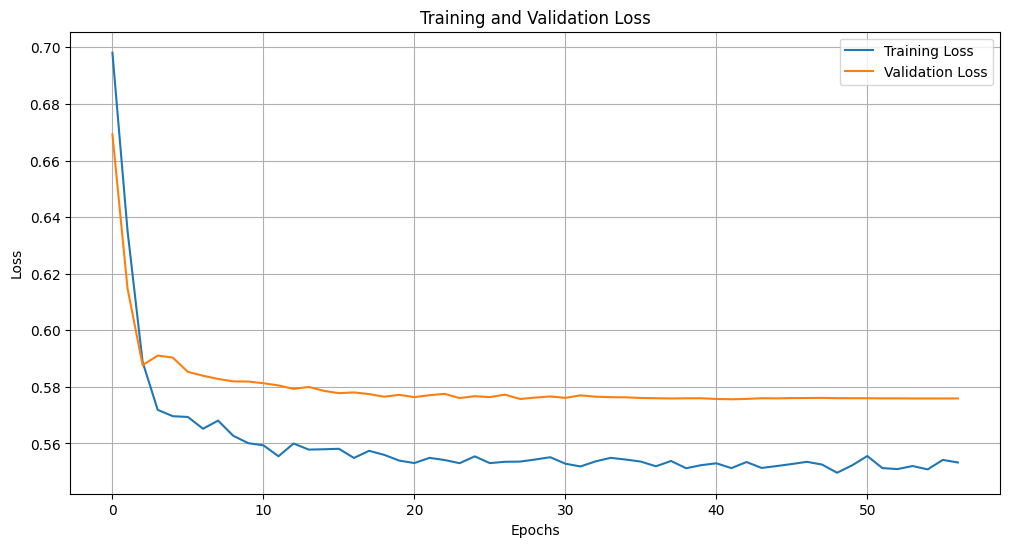

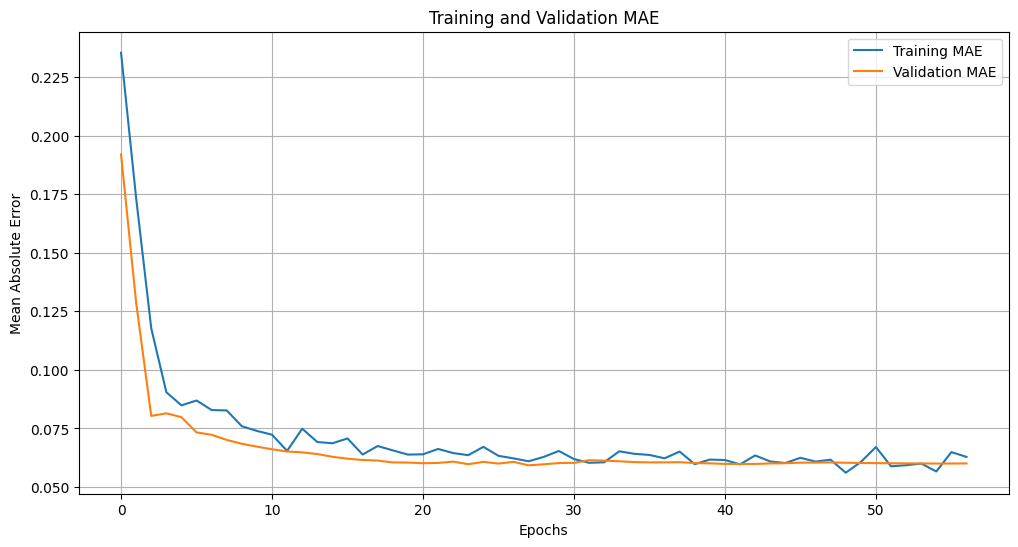

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# نمودار تغییرات MAE (Mean Absolute Error) آموزش و اعتبارسنجی
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['mae'], label='Training MAE')
plt.plot(history_1.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
if 'lr' in history_1.history:
    plt.figure(figsize=(12, 6))
    plt.plot(history_1.history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid(True)
    plt.show()